In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.patches import Rectangle
from matplotlib_venn import venn2
from matplotlib_venn._common import VennDiagram
from sponge import Sponge
from sponge.modules.analysis import load_prior, compare_priors
from typing import Tuple

%matplotlib inline

### Figure S1

### Figure S2

For subfigure A, see further down - B is generated first.

Subfigure B shows the correspondence between the SPONGE motif prior and an older motif prior generated using FIMO.

The SPONGE motif prior was generated using default settings, you can download it [here](https://doi.org/10.5281/zenodo.15063580).

The FIMO motif prior can be found [online](https://sites.google.com/a/channing.harvard.edu/kimberlyglass/tools/resources). 
Here are the direct links to the [prior network](https://drive.google.com/file/d/1Wmw64hZOIoIrdeE2XjUulmbFp2RArcFa/view?usp=sharing)
and the [motif information](https://drive.google.com/file/d/1MlPiAmOxu4mTd4nW9zMygzK1U9F8XB0M/view?usp=sharing).
They can also be downloaded using gdown as below:

In [2]:
# import gdown

# id_prior = '1Wmw64hZOIoIrdeE2XjUulmbFp2RArcFa'
# output_prior = 'fimo_motif_prior.tsv'
# gdown.download(id=id_prior, output=output_prior, fuzzy=True)

# id_info = '1MlPiAmOxu4mTd4nW9zMygzK1U9F8XB0M'
# output_info = 'fimo_motif_info.tsv'
# gdown.download(id=id_info, output=output_info, fuzzy=True)

In [3]:
sponge_prior = load_prior('motif_prior_names_2024.tsv')

In [4]:
fimo_prior = load_prior('fimo_motif_prior.tsv')

We attempt to match the FIMO prior motifs to the respective TF names for comparison.

In [5]:
fimo_motifs = pd.read_table('fimo_motif_info.tsv')
# Replace with base IDs
fimo_motifs['base_id'] = fimo_motifs['MotifID'].apply(
    lambda x: x.split('_')[0]
)
fimo_motifs.set_index('base_id', inplace=True)
# Parse non-human TF names
fimo_motifs['parsed_info'] = fimo_motifs['TF_Info'].apply(
    lambda x: x.split(')')[0][1:] if ')' in x else x
)
# Check there are no duplicates
assert len(fimo_motifs[fimo_motifs['parsed_info'].duplicated()]) == 0
# Create a dictionary for fast mapping
tf_mapping = {base: info for base,info in fimo_motifs['parsed_info'].items()}

In [6]:
fimo_prior['tf'] = fimo_prior['tf'].apply(lambda x: tf_mapping[x])

Statistics for the first prior:
Number of unique TFs: 730
Number of unique genes: 37937
Number of edges: 7400777
Network density: 26.72 %

Statistics for the second prior:
Number of unique TFs: 646
Number of unique genes: 77077
Number of edges: 11698461
Network density: 23.49 %

Number of common TFs: 526
Number of common genes: 23161

Network density in common TF/genes for the first prior: 30.92 %
Network density in common TF/genes for the second prior: 25.02 %

              precision    recall  f1-score   support

           0       0.77      0.84      0.81   8416362
           1       0.56      0.45      0.50   3766324

    accuracy                           0.72  12182686
   macro avg       0.67      0.65      0.65  12182686
weighted avg       0.71      0.72      0.71  12182686



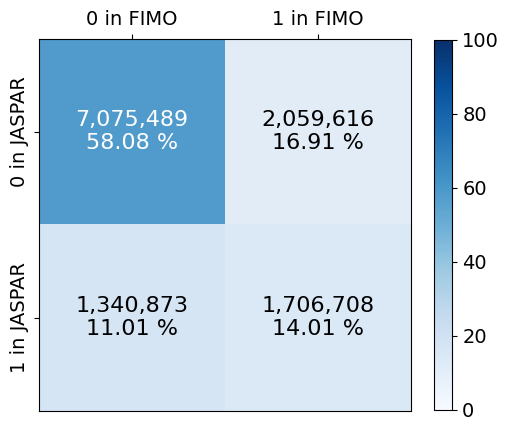

In [7]:
ax_s2b = compare_priors(fimo_prior, sponge_prior)
ax_s2b.set_xticklabels([f'{x} in FIMO' for x in '01'])
ax_s2b.set_yticklabels([f'{x} in JASPAR' for x in '01'])

ax_s2b.get_figure().savefig('fig_s2b.svg', dpi=300, bbox_inches='tight')

Subfigure A shows the overlap between the transcription factors and genes present in two priors.

In [8]:
# Statistics from above (n_tf, n_genes)
stats_fimo = (730, 37937)
stats_jaspar = (646, 77077)
stats_common = (526, 23161)

In [9]:
def plot_venn(
    stats = Tuple[int],
    ax = plt.Axes,
) -> VennDiagram:
    
    vd = venn2(
        subsets=[stats[0] - stats[2],
            stats[1] - stats[2],
            stats[2]],
        set_colors=['C0', 'C1'],
        set_labels=None,
        ax=ax,
    )
    for label in ['10', '01', '11']:
        vd.get_label_by_id(label).set(size=14)

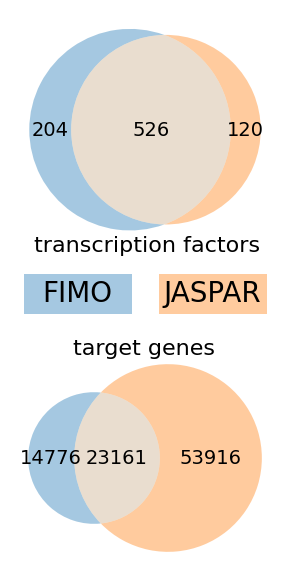

In [10]:
fig_s2a,ax_s2a = plt.subplots(nrows=3, ncols=1, height_ratios=(6,1,6),
    figsize=(3,6), tight_layout=True)
# TF Venn diagram
v_tfs = plot_venn(
    stats=[x[0] for x in (stats_fimo, stats_jaspar, stats_common)],
    ax=ax_s2a[0]
)
ax_s2a[0].text(0, -0.6, 'transcription factors', ha='center', va='center',
    size=16)
# Gene Venn diagram
v_genes = plot_venn(
    stats=[x[1] for x in (stats_fimo, stats_jaspar, stats_common)],
    ax=ax_s2a[2]
)
ax_s2a[2].text(0, 0.6, 'target genes', ha='center', va='center', size=16)
# Legend rectangles
ax_s2a[1].set_axis_off()
ax_s2a[1].add_patch(Rectangle((0.05,0), 0.4, 1, color='C0', alpha=0.4, lw=0))
ax_s2a[1].add_patch(Rectangle((0.55,0), 0.4, 1, color='C1', alpha=0.4, lw=0))
ax_s2a[1].text(0.25, 0.5, 'FIMO', ha='center', va='center', size=20)
ax_s2a[1].text(0.75, 0.5, 'JASPAR', ha='center', va='center', size=20)

fig_s2a.savefig('fig_s2a.svg', dpi=300, bbox_inches='tight')